In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

%matplotlib inline

data=pd.read_csv('shot_logs.csv')

In [2]:
data = data.join(pd.get_dummies(data[['LOCATION','WIN_LOSE']]))
data.head()

,GAME_ID,MATCHUP,LOCATION,WIN_LOSE,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,LOCATION_A,LOCATION_H,WIN_LOSE_L,WIN_LOSE_W
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,101187,1.3,1,2,brian roberts,203148,1,0,0,1
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,202711,6.1,0,0,brian roberts,203148,1,0,0,1
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,202711,0.9,0,0,brian roberts,203148,1,0,0,1
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,203900,3.4,0,0,brian roberts,203148,1,0,0,1
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,201152,1.1,0,0,brian roberts,203148,1,0,0,1


In [3]:
GAME_CLOCK_NORM = []
for i in data['GAME_CLOCK']:
    a = i.split(':')
    b = (int(a[0])*60 + int(a[1]))/720
    GAME_CLOCK_NORM.append(b)

data['GAME_CLOCK_NORM'] = GAME_CLOCK_NORM

In [4]:
#(b)
data.isnull().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
WIN_LOSE                         0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
LOCATION_A                       0
LOCATION_H                       0
WIN_LOSE_L                       0
WIN_LOSE_W                       0
GAME_CLOCK_NORM                  0
dtype: int64

In [5]:
len(data.GAME_ID.unique())

904

In [6]:
#(c)
# split training and testing data
X = data.loc[:,data.columns !='FGM']
Y = data['FGM']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(102455, 25) (102455,)
(25614, 25) (25614,)


In [7]:
#(d)
X_train.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,PTS,player_id,LOCATION_A,LOCATION_H,WIN_LOSE_L,WIN_LOSE_W,GAME_CLOCK_NORM
count,1.024550e+05,102455.000000,102455.000000,102455.000000,97972.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000,102455.000000
mean,2.140045e+07,0.193822,6.506486,2.469923,12.451912,2.023074,2.765850,13.570026,2.264711,158922.794163,4.116916,0.999785,157168.441521,0.501098,0.498902,0.496228,0.503772,0.487740
std,2.577920e+02,13.227785,4.720027,1.141061,5.772267,3.474932,3.055473,8.889701,0.441182,78900.257189,2.746866,1.131746,79379.063791,0.500001,0.500001,0.499988,0.499988,0.288482
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,708.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101187.000000,2.300000,0.000000,101162.000000,0.000000,0.000000,0.000000,0.000000,0.238889
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,201939.000000,1.000000,0.000000,0.000000,1.000000,0.488889
75%,2.140067e+07,9.000000,9.000000,3.000000,16.700000,2.000000,3.700000,22.500000,3.000000,203078.000000,5.300000,2.000000,202704.000000,1.000000,1.000000,1.000000,1.000000,0.737500
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,31.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,3.000000,204060.000000,1.000000,1.000000,1.000000,1.000000,1.000000


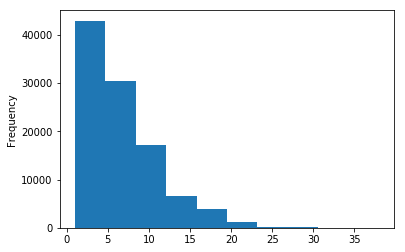

In [8]:
X_train['SHOT_NUMBER'].plot(kind='hist')

In [9]:
correlation = X_train.corrwith(Y_train)
correlation.sort_values(ascending = True)

SHOT_DIST                    -0.189861
PTS_TYPE                     -0.119870
WIN_LOSE_L                   -0.050289
TOUCH_TIME                   -0.044207
DRIBBLES                     -0.033314
PERIOD                       -0.013752
GAME_ID                      -0.009594
SHOT_NUMBER                  -0.008219
LOCATION_A                   -0.006411
player_id                    -0.005965
CLOSEST_DEFENDER_PLAYER_ID   -0.000307
CLOSE_DEF_DIST                0.001077
LOCATION_H                    0.006411
GAME_CLOCK_NORM               0.012637
WIN_LOSE_W                    0.050289
FINAL_MARGIN                  0.059095
SHOT_CLOCK                    0.097384
PTS                           0.970574
dtype: float64

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


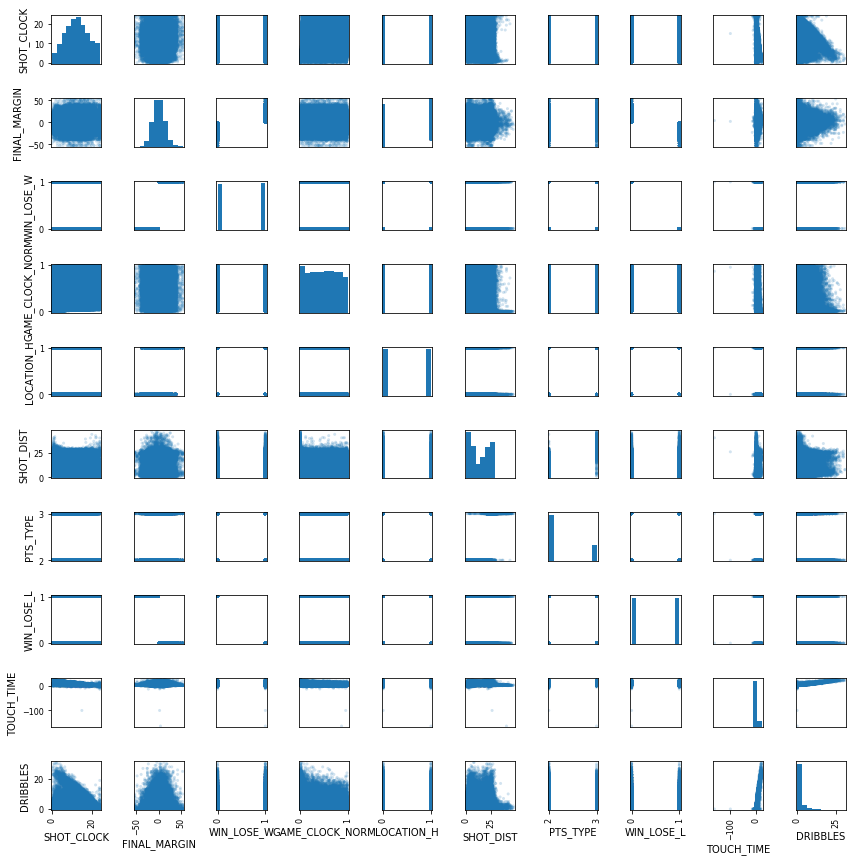

In [12]:
corr_list = ['SHOT_CLOCK','FINAL_MARGIN','WIN_LOSE_W', 'GAME_CLOCK_NORM','LOCATION_H',
             'SHOT_DIST','PTS_TYPE','WIN_LOSE_L', 'TOUCH_TIME','DRIBBLES']
pd.tools.plotting.scatter_matrix(X_train[corr_list], alpha=0.2, figsize=(12,12))
plt.tight_layout()   



In [13]:
X_train[corr_list].cov()

,SHOT_CLOCK,FINAL_MARGIN,WIN_LOSE_W,GAME_CLOCK_NORM,LOCATION_H,SHOT_DIST,PTS_TYPE,WIN_LOSE_L,TOUCH_TIME,DRIBBLES
SHOT_CLOCK,33.319062,-0.649817,-0.065606,0.033510,0.026092,-8.857592,-0.086623,0.065606,-2.523030,-1.624057
FINAL_MARGIN,-0.649817,174.974302,5.354736,0.025673,1.036112,1.009156,0.139471,-5.354736,0.414171,0.513741
WIN_LOSE_W,-0.065606,5.354736,0.249988,0.002451,0.029347,0.017661,0.002696,-0.249988,0.020409,0.022050
GAME_CLOCK_NORM,0.033510,0.025673,0.002451,0.083222,0.000099,-0.057890,-0.006163,-0.002451,-0.090262,-0.116228
LOCATION_H,0.026092,1.036112,0.029347,0.000099,0.250001,-0.003251,0.001252,-0.029347,-0.019458,-0.025020
SHOT_DIST,-8.857592,1.009156,0.017661,-0.057890,-0.003251,79.026791,2.905178,-0.017661,-2.311602,-2.576993
PTS_TYPE,-0.086623,0.139471,0.002696,-0.006163,0.001252,2.905178,0.194641,-0.002696,-0.242809,-0.258885
WIN_LOSE_L,0.065606,-5.354736,-0.249988,-0.002451,-0.029347,-0.017661,-0.002696,0.249988,-0.020409,-0.022050
TOUCH_TIME,-2.523030,0.414171,0.020409,-0.090262,-0.019458,-2.311602,-0.242809,-0.020409,9.335914,9.673248
DRIBBLES,-1.624057,0.513741,0.022050,-0.116228,-0.025020,-2.576993,-0.258885,-0.022050,9.673248,12.075150
